<a href="https://colab.research.google.com/github/chitoge729/TE_DSBDA/blob/main/DSBDA_Asgn_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sudarshan-koirala/Logistic-Regression-Social-Network-Ads/master/Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

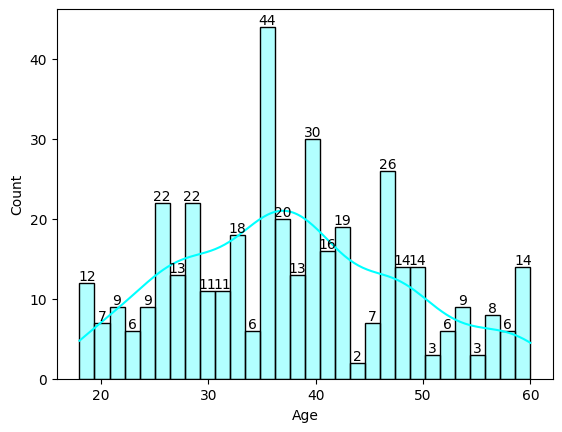

In [10]:
histplot = sns.histplot(df['Age'], kde = True, bins = 30, color = 'aqua', alpha = 0.3, stat = 'count')
for i in histplot.containers:
  histplot.bar_label(i, )
plt.show()

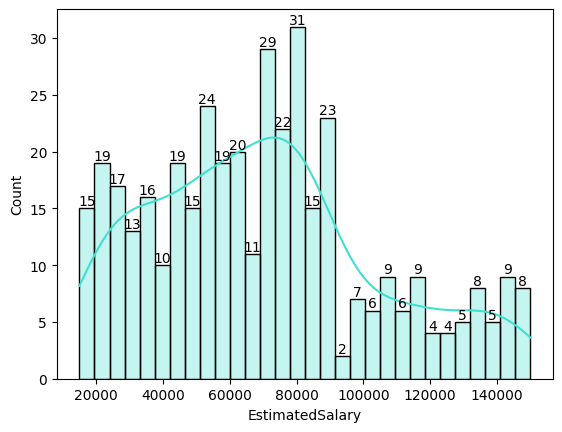

In [14]:
histplot = sns.histplot(df['EstimatedSalary'], kde = True, bins = 30, color = 'turquoise', alpha = 0.3)
for i in histplot.containers:
  histplot.bar_label(i, )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

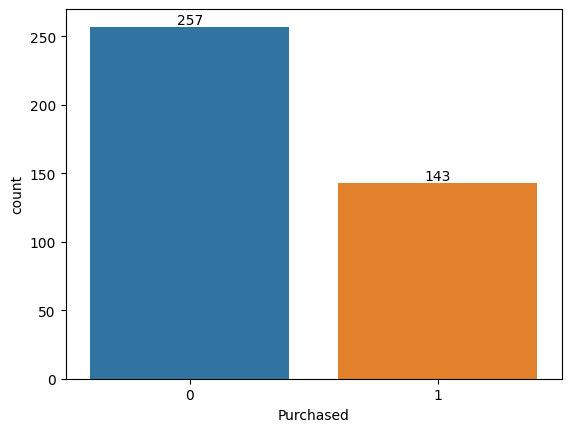

In [25]:
countplot = sns.countplot(x = df['Purchased'], )
for i in countplot.containers:
  countplot.bar_label(i, )
plt.show

In [22]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [27]:
le = LabelEncoder()

In [28]:
df['Gender'] = le.fit_transform(df['Gender'])

In [29]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

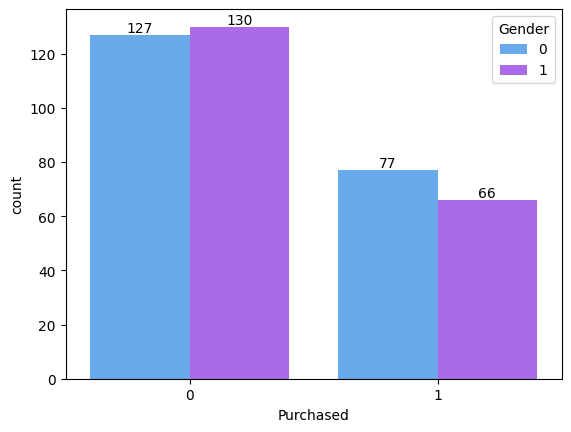

In [42]:
countplot = sns.countplot(data = df, x = 'Purchased', hue = 'Gender', palette = 'cool')
for i in countplot.containers:
  countplot.bar_label(i, )
plt.show()

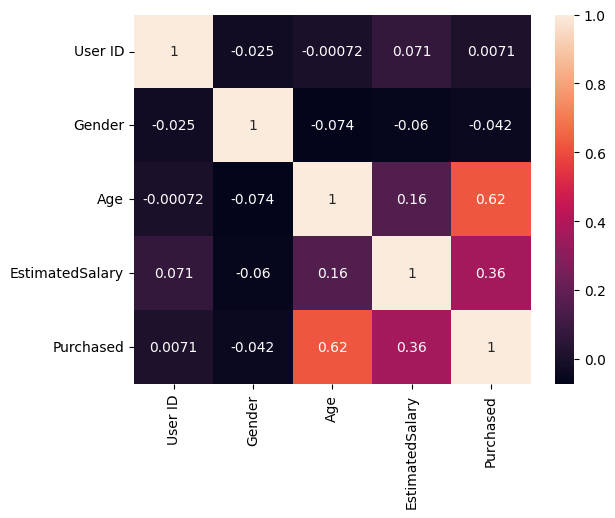

In [43]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [48]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [49]:
ss = StandardScaler()
x = ss.fit_transform(X)

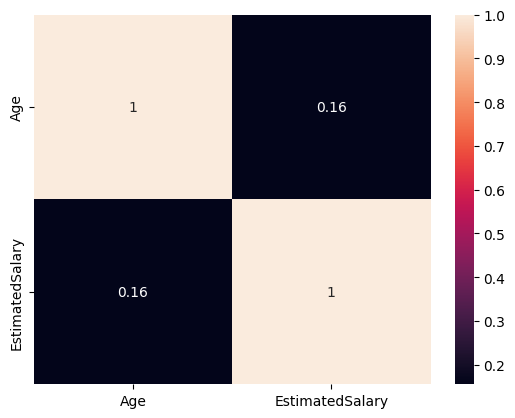

In [50]:
sns.heatmap(X.corr(), annot = True)
plt.show()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [55]:
model = LogisticRegression()

In [56]:
model.fit(x_train, y_train)

LogisticRegression()

In [57]:
y_pred = model.predict(x_test)

In [59]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


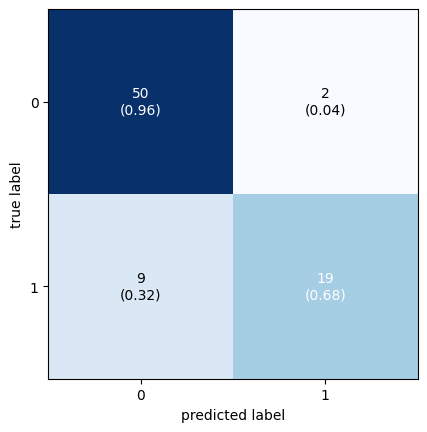

In [60]:
plot_confusion_matrix(conf_mat = cm, show_normed = True)
plt.show()

In [62]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [64]:
accuracy_score(y_test, y_pred)

0.8625

In [65]:
f1_score(y_test, y_pred)

0.7755102040816326

In [66]:
precision_score(y_test, y_pred)

0.9047619047619048

In [68]:
recall_score(y_test, y_pred)

0.6785714285714286